# Assignment 2.2: Convolutional Neural Network
Student Name 1: ...

Student Name 2: ...

Student Name 3: ...

## German Traffic Sign Benchmark

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [3]:
#!wget http://www.dia.fi.upm.es/~lbaumela/FullIJCNN2013.zip
#!unzip FullIJCNN2013.zip
!unzip '/content/drive/My Drive/FullIJCNN2013.zip'

Archive:  /content/drive/My Drive/FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN2013/00009.ppm  
  inflating: FullIJCNN2013/00010.ppm  
  inflating: FullIJCNN2013/00011.ppm  
  inflating: FullIJCNN2013/00012.ppm  
  inflating: FullIJCNN2013/00013.ppm  
  inflating: FullIJCNN2013/00014.ppm  
  inflating: FullIJCNN2013/00015.ppm  
  inflating: FullIJCNN2013/00016.ppm  
  inflating: FullIJCNN2013/00017.ppm  
  inflating: FullIJCNN2013/00018.ppm  
  inflating: FullIJCNN2013/00019.ppm  
  inflating: FullIJCNN2013/00020.ppm  
  inflating: FullIJCNN2013/00021.ppm  
  inflating: FullIJCNN2013/0002

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (32, 32)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_UNCHANGED)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [0]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213))

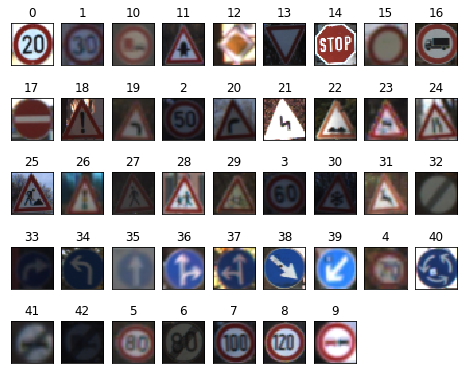

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [0]:
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600]
va_signs = np.array(train_signs)[600:852]
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

In [0]:
# Tensorboard
from time import time
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

DATA AUGMENTATION AND OVERSAMPLING


Counter({'10': 63, '2': 59, '38': 57, '12': 54, '13': 52, '1': 48, '8': 47, '7': 37, '5': 37, '9': 32, '4': 31, '18': 27, '11': 26, '17': 25, '14': 22, '3': 21, '25': 21, '6': 17, '35': 15, '30': 14, '33': 13, '23': 13, '26': 11, '15': 10, '22': 9, '28': 9, '34': 9, '20': 9, '36': 8, '42': 7, '40': 7, '16': 7, '41': 6, '21': 5, '39': 4, '0': 4, '29': 4, '32': 3, '27': 3, '24': 2, '19': 2, '31': 1, '37': 1})


<BarContainer object of 43 artists>

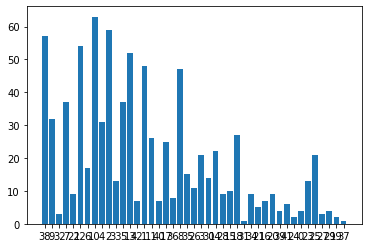

In [12]:
import collections
import matplotlib.pyplot as plt
counter=collections.Counter(train_labels)
print(counter)
plt.bar(counter.keys(), counter.values())

In [0]:
from keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(
    rotation_range=15)

In [14]:
from keras.utils.data_utils import Sequence
from imblearn.over_sampling import RandomOverSampler
from imblearn.keras import balanced_batch_generator

class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = batch_size
        self._shape = x.shape        
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)

    def __len__(self):
        return self._shape[0] // self.batch_size

    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from s

In [15]:
bgen = BalancedDataGenerator(tr_signs, tr_labels, image_gen, batch_size=16)
steps_per_epoch = bgen.steps_per_epoch

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


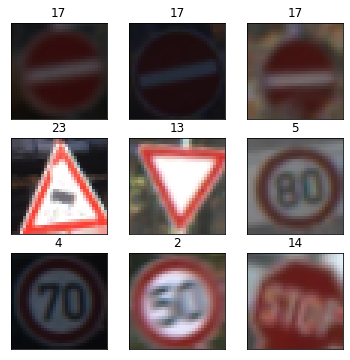

In [16]:
for x_batch, y_batch in image_gen.flow(tr_signs, tr_labels, batch_size=9):
    # create a grid of 3x3 images
    fig = plt.figure(figsize=(6,6))
    for i in range(0, 9):
        ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
        ax.set_title(np.argmax(y_batch[i]))
        plt.imshow(cv2.cvtColor(x_batch[i], cv2.COLOR_BGR2RGB))
    # show the plot
    plt.show()
    break

DEFINING MODEL

In [17]:
# from keras.models import Sequential
 from keras.layers import Dense, Dropout, Activation, Flatten
 from keras import optimizers
 from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Conv3D, MaxPool3D

#CNN
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(6,6), activation='relu', input_shape=(SIGN_SIZE[0], SIGN_SIZE[1], 3)))
model.add(Conv2D(filters=64, kernel_size=(4, 4), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.35))
# FLATTEN
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

opt = optimizers.adam(lr=0.0002)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
#return model






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 27, 32)        3488      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2359552  

In [0]:
from keras.callbacks import ModelCheckpoint
filepath="German_Traffic_DenseNetworkModel_AfterAugmentation.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [19]:
from keras.callbacks import TensorBoard
data_aug = model.fit_generator(bgen,steps_per_epoch=len(tr_signs) / 16, epochs=200, validation_data=(va_signs, va_labels),callbacks=callbacks_list)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)





38/37 [==============================] - 15s 386ms/step - loss: 3.7402 - acc: 0.0493 - val_loss: 3.6795 - val_acc: 0.1468

Epoch 00001: val_acc improved from -inf to 0.14683, saving model to German_Traffic_DenseNetworkModel_AfterAugmentation.hdf5
Epoch 2/200
38/37 [==============================] - 0s 9ms/step - loss: 3.5516 - acc: 0.1086 - val_loss: 3.4374 - val_acc: 0.0952

Epoch 00002: val_acc did not improve from 0.14683
Epoch 3/200
38/37 [==============================] - 1s 14ms/step - loss: 3.1930 - acc: 0.1628 - val_loss: 2.8837 - val_acc: 0.3690

Epoch 00003: val_acc improved from 0.14683 to 0.36905, saving model to German_Traffic_DenseNetworkModel_AfterAugmentation.hdf5
Epoch 4/200
38/37 [==============================] - 0s 13ms/step - loss: 2.5869 - acc: 0.3272 - val_loss: 2.4247 - val_acc: 0.4325

Epoch 00004: val_acc improved from 0.36905 to 0.43254, saving model to German_Traffic_DenseNetworkModel_AfterAugmentation.hdf5
Epoch 5/200
38/37 [=============================

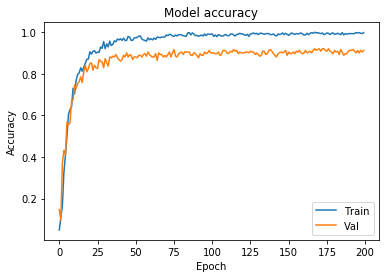

In [20]:
#Plotting Accuracy   train and  accurracy validation  with augmented data
plt.plot(data_aug.history['acc'])
plt.plot(data_aug.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

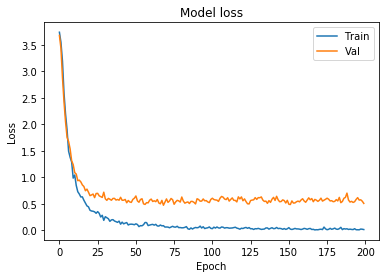

In [21]:
plt.plot(data_aug.history['loss'])
plt.plot(data_aug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [25]:
model.load_weights("German_Traffic_DenseNetworkModel_AfterAugmentation.hdf5")
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
start = time()
loss, acc = model.evaluate(te_signs, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

CNN took 0.08781576156616211 seconds
Test loss: 0.2536731259252391 - Accuracy: 0.9556786705252206
